In [2]:
import pandas as pd
from pandas import Series
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Rathin\\Desktop\\Python notebooks'

In [5]:
pri = pd.read_excel("price_cleaned.xlsx",encoding="ISO-8859-1")

In [6]:
pri.head()

,date,symbol,close
0,2016-01-05,WLTW,125.839996
1,2016-01-06,WLTW,119.980003
2,2016-01-07,WLTW,114.949997
3,2016-01-08,WLTW,116.620003
4,2016-01-11,WLTW,114.970001


In [7]:
pri.tail()

,date,symbol,close
851259,2016-12-30,ZBH,103.199997
851260,2016-12-30,ZION,43.040001
851261,2016-12-30,ZTS,53.529999
851262,2016-12-30,AIV,45.450001
851263,2016-12-30,FTV,53.630001


In [9]:
pri.columns

Index(['date', 'symbol', 'close'], dtype='object')

In [66]:
pri.set_index('symbol','date')

,date,close
symbol,,
WLTW,2016-01-05,125.839996
WLTW,2016-01-06,119.980003
WLTW,2016-01-07,114.949997
WLTW,2016-01-08,116.620003
WLTW,2016-01-11,114.970001
WLTW,2016-01-12,115.550003
WLTW,2016-01-13,112.849998
WLTW,2016-01-14,114.379997
WLTW,2016-01-15,112.529999


In [135]:
prices=pri.loc[pri['symbol']=='JNJ',['close','date','symbol']]

In [136]:
prices.head()

,close,date,symbol
487,64.680000,2010-01-04,JNJ
955,63.930000,2010-01-05,JNJ
1423,64.449997,2010-01-06,JNJ
1891,63.990002,2010-01-07,JNJ
2359,64.209999,2010-01-08,JNJ


In [12]:
prices.describe()

,close
count,1762.000000
mean,84.677701
std,19.808971
min,57.020000
25%,64.822500
50%,86.755001
75%,101.367503
max,125.400002


In [15]:
prices['double']=prices.close*prices.close

In [16]:
del prices['double']

In [17]:
import matplotlib.pyplot as plt

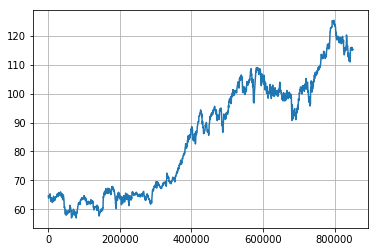

In [18]:
prices['close'].plot(grid=True)
plt.show()

In [19]:
daily_close = prices.close

In [20]:
daily_pct_change = daily_close.pct_change()

In [68]:
prices['pct_change']=daily_pct_change

In [69]:
prices.head()

,close,date,symbol,pct_change
487,64.680000,2010-01-04,JNJ,NaN
955,63.930000,2010-01-05,JNJ,-0.011596
1423,64.449997,2010-01-06,JNJ,0.008134
1891,63.990002,2010-01-07,JNJ,-0.007137
2359,64.209999,2010-01-08,JNJ,0.003438


In [52]:
daily_pct_change.head()

487          NaN
955    -0.011596
1423    0.008134
1891   -0.007137
2359    0.003438
Name: close, dtype: float64

In [22]:
daily_log_returns = np.log(daily_close.pct_change()+1)

In [70]:
prices['daily_log_returns']=daily_log_returns

In [71]:
prices.date=pd.to_datetime(prices['date'])

In [72]:
prices.head()

,close,date,symbol,pct_change,daily_log_returns
487,64.680000,2010-01-04,JNJ,NaN,NaN
955,63.930000,2010-01-05,JNJ,-0.011596,-0.011663
1423,64.449997,2010-01-06,JNJ,0.008134,0.008101
1891,63.990002,2010-01-07,JNJ,-0.007137,-0.007163
2359,64.209999,2010-01-08,JNJ,0.003438,0.003432


In [73]:
monthly = prices.resample('BM',on='date').mean()

In [74]:
monthly.pct_change().head()

,close,pct_change,daily_log_returns
date,,,
2010-01-29,NaN,NaN,NaN
2010-02-26,-0.013550,-1.093870,-1.073842
2010-03-31,0.018571,9.343823,11.745741
2010-04-30,0.011565,-1.425728,-1.443515
2010-05-31,-0.038624,6.536313,6.399811


In [75]:
quarter = prices.resample('4M',on='date').mean()

In [76]:
quarter.pct_change().head()

,close,pct_change,daily_log_returns
date,,,
2010-01-31,NaN,NaN,NaN
2010-05-31,-0.003144,-0.435290,-0.427796
2010-09-30,-0.071521,-1.858913,-1.780302
2011-01-31,0.058470,-1.542198,-1.605088
2011-05-31,-0.013285,-4.611060,-4.332920


In [77]:
daily_shift = daily_close/daily_close.shift(1) -1

In [78]:
prices['daily_shift']=daily_shift

In [79]:
prices.head()

,close,date,symbol,pct_change,daily_log_returns,daily_shift
487,64.680000,2010-01-04,JNJ,NaN,NaN,NaN
955,63.930000,2010-01-05,JNJ,-0.011596,-0.011663,-0.011596
1423,64.449997,2010-01-06,JNJ,0.008134,0.008101,0.008134
1891,63.990002,2010-01-07,JNJ,-0.007137,-0.007163,-0.007137
2359,64.209999,2010-01-08,JNJ,0.003438,0.003432,0.003438


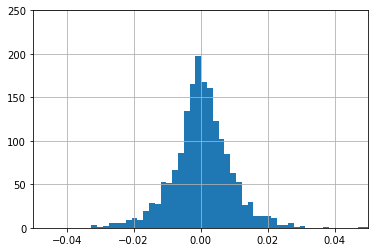

In [80]:
daily_pct_change.hist(bins=50)
plt.xlim([-0.05,0.05])
plt.ylim([0,250])
plt.show()

In [81]:
daily_pct_change.describe()

count    1761.000000
mean        0.000367
std         0.008889
min        -0.032696
25%        -0.004183
50%         0.000198
75%         0.005226
max         0.053821
Name: close, dtype: float64

In [82]:
cum_daily_return = (1+ daily_pct_change).cumprod()

In [83]:
prices['cum_daily_return']=cum_daily_return

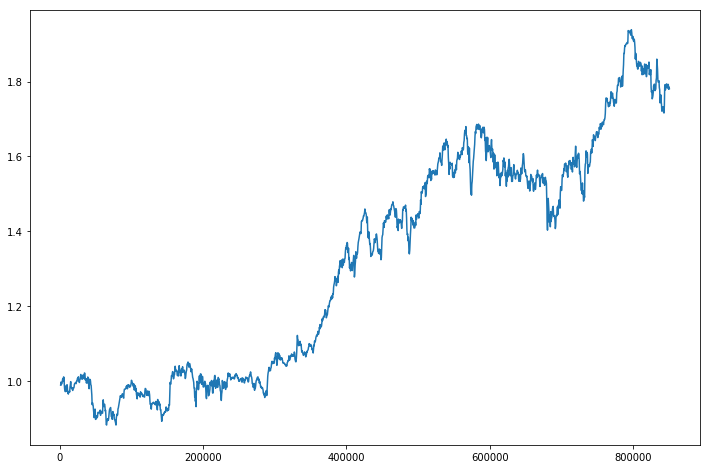

In [84]:
cum_daily_return.plot(figsize=(12,8))
plt.show()

In [41]:
cum_daily_return.head()

487          NaN
955     0.988404
1423    0.996444
1891    0.989332
2359    0.992733
Name: close, dtype: float64

In [87]:
prices.resample('M',on='date').mean().head()

,close,pct_change,daily_log_returns,daily_shift,cum_daily_return
date,,,,,
2010-01-31,64.128947,-0.001546,-0.001586,-0.001546,0.991007
2010-02-28,63.260000,0.000145,0.000117,0.000145,0.978046
2010-03-31,64.434782,0.001501,0.001492,0.001501,0.996209
2010-04-30,65.180000,-0.000639,-0.000662,-0.000639,1.007730
2010-05-31,62.662500,-0.004815,-0.004898,-0.004815,0.968808


In [223]:
adj_close=prices[['date','close']]

In [99]:
moving_avg=adj_close.rolling(window=40).mean()

In [101]:
prices['moving_avg']=moving_avg

In [104]:
moving_max=adj_close.rolling(window=40).max()

In [105]:
moving_min=adj_close.rolling(window=40).min()

In [106]:
moving_var=adj_close.rolling(window=40).var()

In [107]:
prices['moving_max']=moving_max
prices['moving_min']=moving_min
prices['moving_var']=moving_var

In [114]:
prices.tail()

,close,date,symbol,pct_change,daily_log_returns,daily_shift,cum_daily_return,moving_avg,moving_max,moving_min,moving_var
849013,115.959999,2016-12-23,JNJ,0.004504,0.004494,0.004504,1.792826,114.87100,120.309998,110.989998,4.989179
849513,115.910004,2016-12-27,JNJ,-0.000431,-0.000431,-0.000431,1.792053,114.88550,120.309998,110.989998,5.011242
850013,115.099998,2016-12-28,JNJ,-0.006988,-0.007013,-0.006988,1.779530,114.86325,120.309998,110.989998,4.980634
850513,115.489998,2016-12-29,JNJ,0.003388,0.003383,0.003388,1.785560,114.86700,120.309998,110.989998,4.984864
851013,115.209999,2016-12-30,JNJ,-0.002424,-0.002427,-0.002424,1.781231,114.87575,120.309998,110.989998,4.987801


In [115]:
moving_long=adj_close.rolling(window=200).mean()

In [116]:
prices['moving_long']=moving_long

In [118]:
prices[['close','moving_avg','moving_long']].plot()

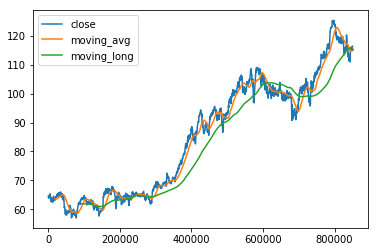

In [119]:
plt.show()

In [144]:
min_periods=75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

In [145]:
prices['vol']=vol

In [146]:
vol.plot()

In [156]:
prices.plot(x='date',y='vol')

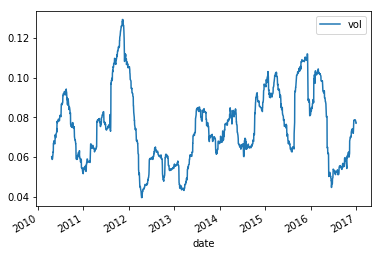

In [157]:
plt.show()

In [159]:
import statsmodels.api as sm
from pandas.core import datetools

In [210]:
adj_close=adj_close.dropna()
shift=adj_close.shift(1)
shift=shift.dropna()

In [211]:
all_returns=np.log(adj_close/adj_close.shift(1))

In [212]:
x=sm.add_constant(all_returns)

In [213]:
model=sm.OLS(all_returns,x).fit()

C:\Users\Rathin\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


In [214]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Apr 2018   Prob (F-statistic):                nan
Time:                        01:47:41   Log-Likelihood:                    nan
No. Observations:                1762   AIC:                               nan
Df Residuals:                    1762   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\Rathin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Rathin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Rathin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Rathin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1348: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


In [218]:
cl=prices['date','close']

KeyError: ('date', 'close')

In [216]:
from statsmodels.tsa.arima_model import ARIMA

In [227]:
adj_close

,date,close
487,2010-01-04,64.680000
955,2010-01-05,63.930000
1423,2010-01-06,64.449997
1891,2010-01-07,63.990002
2359,2010-01-08,64.209999
2827,2010-01-11,64.220001
3295,2010-01-12,64.559998
3763,2010-01-13,64.970001
4231,2010-01-14,65.099998
4699,2010-01-15,64.559998
